<a href="https://colab.research.google.com/github/harshitha-0531/Customer_persona/blob/main/Day5_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import all libraies plotly scipy .cluter.nirecahcy and skelarn .custer amnd preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sns.set_style('whitegrid')

In [ ]:
!git clone https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset.git


In [ ]:
df= pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/Mall_Customers.csv')
display(df.head(5))

In [ ]:
!ls -R "/content/"

In [ ]:
df.info()
# df.drop()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:

df.columns

In [ ]:
df.drop('CustomerID',axis=1,inplace=True)
df.describe()

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(20,5))
fig.suptitle('Distribution of customer Features', fontsize=16)
sns.histplot(df['Age'],ax=axes[0],bins=20,kde=True).set_title('Age')
sns.histplot(df['Annual Income (k$)'],ax=axes[1],bins=20,kde=True).set_title('Annual Income')
sns.histplot(df['Spending Score (1-100)'],ax=axes[2],bins=20,kde=True).set_title('Spending Score')
plt.show()

In [ ]:
sns.pairplot(df, vars=['Age', 'Annual Income (k$)','Spending Score (1-100)'],hue='Gender')
plt.suptitle('Pairplot of Customer Features', fontsize=16)
plt.show()

In [ ]:
# bivariate analysis for anual income and spending score use sns
import plotly.express as px
fig = px.scatter(df, x="Annual Income (k$)", y="Spending Score (1-100)", color="Gender")
fig.show()


In [ ]:
fig=px.scatter_3d(df, x='Annual Income (k$)',
                  y='Spending Score (1-100)',
                  z='Age',
                  color='Gender',
                  title='3D view of customer Data')
fig.show()

In [ ]:
# slect and scle features
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X1=df[['Annual Income (k$)','Spending Score (1-100)']]
scaler1=StandardScaler()
X1_scaled=scaler1.fit_transform(X1)

wcss1=[]
for k in range(1,11):
  kmeans =KMeans(n_clusters=k, init='k-means++',random_state=42, n_init=10)
  kmeans.fit(X1_scaled)
  wcss1.append(kmeans.inertia_)
  # plot the elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss1, marker='o',linestyle='--'  )
plt.title('The Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1,11))

plt.show()

In [ ]:
# build fir an d final model
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42,n_init=10)
df['Income_Cluster']=kmeans.fit_predict(X1_scaled)

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',hue='Income_Cluster',
                  palette='viridis', s=100,alpha=0.8,edgecolor='black' ,data=df)
plt.title('Income Clusters')
plt.show()

In [ ]:
cluster_profiles1= df.groupby('Income_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
cluster_profiles1['Size']=df['Income_Cluster'].value_counts()

print(cluster_profiles1)


In [ ]:

X2=df[['Age','Spending Score (1-100)']]
scaler2=StandardScaler()
X2_scaled=scaler2.fit_transform(X2)
wcss2=[]

for k in range(1,11):
  kmeans=KMeans(n_clusters=k, init='k-means++',random_state=42,n_init=10)
  kmeans.fit(X2_scaled)
  wcss2.append(kmeans.inertia_)
# plot the elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss2, marker='o',linestyle='--')
plt.title('The Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1,11))
plt.show()

In [ ]:
# build and fit final model fro age segmentation
kmeans2=KMeans(n_clusters=5,init='k-means++',random_state=42,n_init=10)
df['Age_Cluster']=kmeans2.fit_predict(X2_scaled)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='Spending Score (1-100)',hue='Age_Cluster',
               palette='viridis',s=100,alpha=0.8,edgecolor='black',data=df)

In [ ]:
plt.figure(figsize=(10,6))
dendrogram=sch.dendrogram(sch.linkage(X2_scaled,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.axhline(y=6,color='r',linestyle='--')
plt.show()

In [30]:
# 1 . Exploring gender vs Spending Score
gender_status=df.groupby('Gender')['Spending Score (1-100)'].describe()
print(gender_status)

        count       mean       std  min   25%   50%   75%   max
Gender                                                         
Female  112.0  51.526786  24.11495  5.0  35.0  50.0  73.0  99.0
Male     88.0  48.511364  27.89677  1.0  24.5  50.0  70.0  97.0


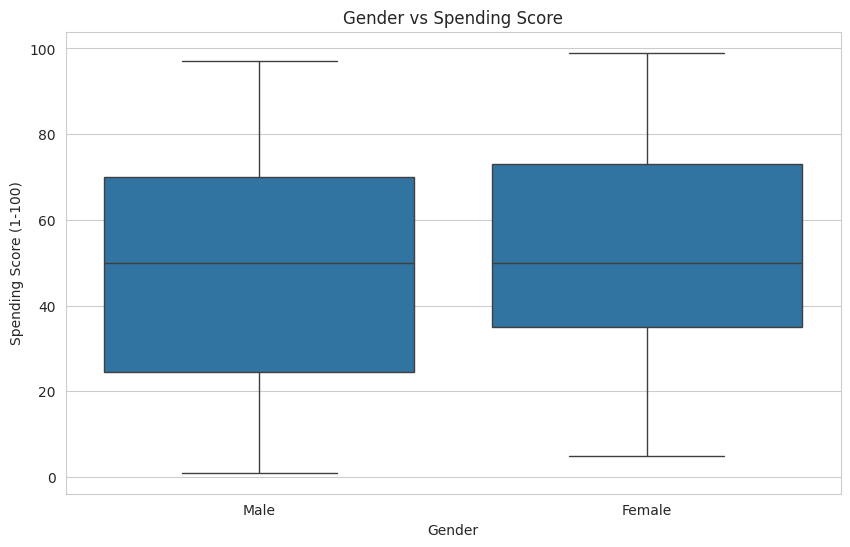

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender',y='Spending Score (1-100)',data=df)
plt.title('Gender vs Spending Score')
plt.show()

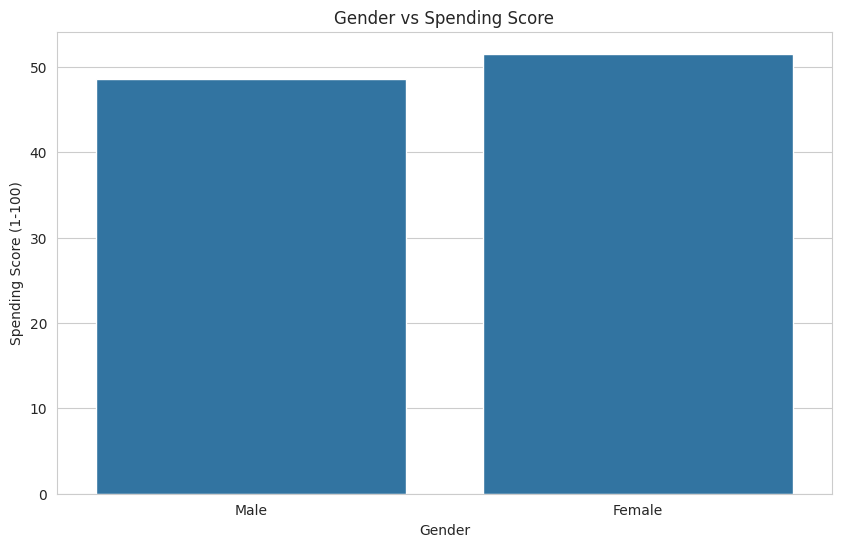

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(x='Gender',y='Spending Score (1-100)',data=df,estimator=lambda x:x.mean(),errorbar=None)
plt.title('Gender vs Spending Score')
plt.show()

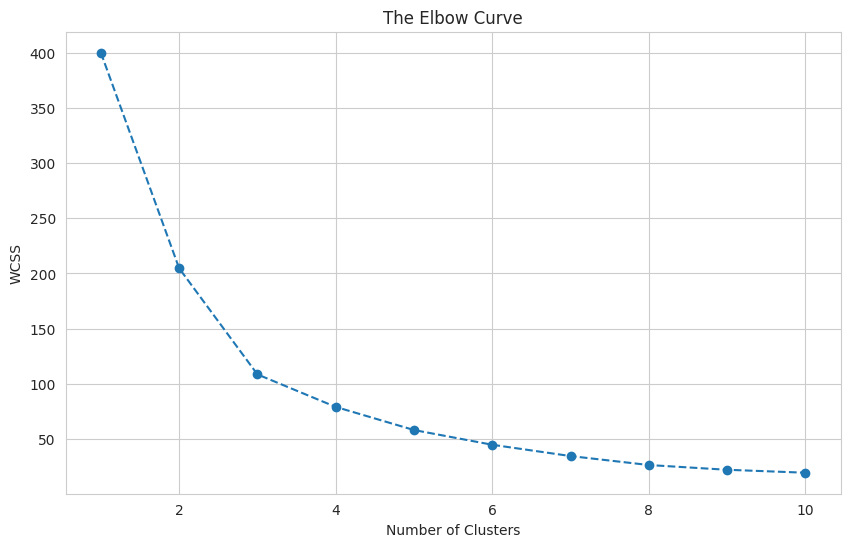

In [38]:
# 2. Feature Engineering  & Clustering
df['Income_Spend_Ratio']=df['Spending Score (1-100)']/(df['Annual Income (k$)']+1)
X=df[['Annual Income (k$)','Income_Spend_Ratio']]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

# elbow try
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42,n_init=10)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)
# plot the elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.title('The Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

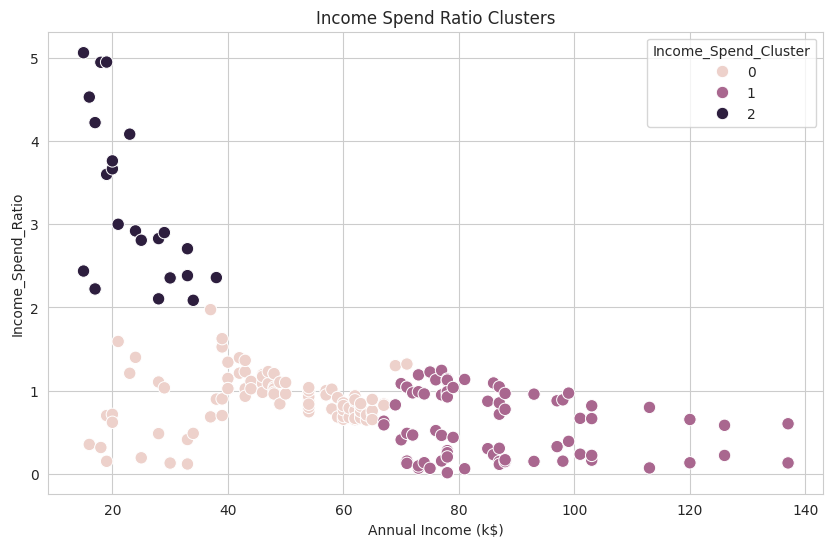

In [39]:
# Final fit
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42,n_init=10)
df['Income_Spend_Cluster']=kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)',y='Income_Spend_Ratio',hue='Income_Spend_Cluster', data=df,s=80)
plt.title('Income Spend Ratio Clusters')
plt.show()

